## Modelo de Machine Learning - Previsão de Vendas de Cancelamento de Operadora TV a Cabo <br>

### Resumo das atividades<br>
<p> 1 - Analise Exploratória das variáveis Categóricas e Numéricas utilizando diversos gráficos<br>    
<p> 2 - Tratamento de Dados e Engenharia de Atributos <br>
<p> 3 - Identificar e Tratar OUTLIERS e Valores Missing<br>    
<p> 3 - Funções do Pacote Pandas <br>    
<p> 4 - OneHotEncoding e Padronização de Dados <br>
<p> 4 - Criar, Treinar e Avaliar o Algoritmo de Machine Learning <br><br>


In [237]:
# Importando os pacotes que serão utilizados

# Para manipulação e tratamento dos dados
import numpy as np
import pandas as pd 
import time #utilizada para funções de tempo
import matplotlib.pyplot as plt #Utilizada para gráficos
import seaborn as sns #Utilizada para gráficos

# Bibliotecas do Skit Learn
from sklearn.model_selection import train_test_split #Utilizada para separar dados pra treino e teste
from sklearn.preprocessing import StandardScaler #Utilizada para fazer a padronização dos dados
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import accuracy_score #Utilizada para avaliar a acurácia do modelo preditivo
from sklearn.neighbors import KNeighborsClassifier #Nosso Algoritmo para criação do modelo
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados


In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier 
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


In [241]:
# Para remover avisos de alerta
import warnings #Utilizada para avisos de alertas
warnings.filterwarnings("ignore") #Ignorar avisos de alertas. Obs.: Alertas NÃO são erros, são apenas mensagens informativas

# Para não limitar a exibição do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

## Coleta de Dados
<p> Utilizaremos o arquivo dados.csv para importar os nosso dataset

In [4]:
#df_original = pd.read_csv("dados.csv", sep = ';', encoding="ISO-8859-1")
df_original = pd.read_csv("dados.csv", sep = ';')

## Analise Exploratória

<p> Vamos analisar as variáveis categoricas e númericas e identificar os dados que precisarão ser tratados

In [6]:
# Visualizar as Linhas e Colunas do Arquivo --> Observações e Variáveis
df_original.shape

(448447, 24)

In [7]:
# Visualizar as primeiras linha do arquivo
df_original.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0


In [8]:
# Verificar os tipos de dados das variáveis
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

In [9]:
df_original['DT_AQUISICAO'].min()

'01/01/2001'

In [10]:
df_original['DT_AQUISICAO'].max()

'31/12/2020'

In [11]:
#Avaliar o período dos dados coletados
inicio = pd.to_datetime(df_original['DT_AQUISICAO']).dt.date.min()
fim = pd.to_datetime(df_original['DT_AQUISICAO']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2001-01-01 Até: 2021-06-29


In [12]:
### Como observado, pelo fato do campo estar com o tipo Object, está trazendo o máximo errado

In [13]:
df_original['DT_AQUISICAO'] = pd.to_datetime(df_original['DT_AQUISICAO'])
df_original['DT_CANCELAMENTO'] = pd.to_datetime(df_original['DT_CANCELAMENTO'])

In [14]:
df_original['DT_AQUISICAO'].min()

Timestamp('2001-01-01 00:00:00')

In [15]:
df_original['DT_AQUISICAO'].max()

Timestamp('2021-06-29 00:00:00')

In [16]:
# Resumo estatistico básico do nosso dataset
df_original.describe()

,ID_CLIENTE,IDADE_CLIENTE,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,COD_SITUACAO
count,448447.000000,448447.000000,448193.000000,448447,117455,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000
mean,224224.000000,38.891140,1.526385,2018-03-29 16:33:22.237945856,2013-12-24 13:28:11.544846848,483.857783,15.772457,303.769386,349.798596,1.625269,3.917281,1.019175,0.563596,3.353685,0.188029,337.364498,303.769386,349.798596,0.261915
min,1.000000,23.000000,0.000000,2001-01-01 00:00:00,2001-06-05 00:00:00,22.000000,1.000000,230.000000,265.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,265.000000,0.000000
25%,112112.500000,35.000000,1.000000,2018-03-21 00:00:00,2011-02-01 00:00:00,167.000000,5.000000,230.000000,265.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,230.000000,265.000000,0.000000
50%,224224.000000,40.000000,2.000000,2019-06-07 00:00:00,2015-01-28 00:00:00,329.000000,11.000000,230.000000,265.000000,2.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,230.000000,265.000000,0.000000
75%,336335.500000,43.000000,2.000000,2020-08-14 00:00:00,2017-12-01 00:00:00,798.000000,26.000000,350.000000,403.000000,2.000000,5.000000,2.000000,1.000000,5.000000,0.000000,794.000000,350.000000,403.000000,1.000000
max,448447.000000,55.000000,25.000000,2021-06-29 00:00:00,2021-07-21 00:00:00,1296.000000,42.000000,600.000000,690.000000,3.000000,100.000000,38.000000,17.000000,100.000000,5.000000,16043.000000,600.000000,690.000000,1.000000
std,129455.642421,6.682351,0.504288,NaN,NaN,373.649523,12.252344,113.612746,130.560943,0.579956,1.460079,1.474442,0.886314,1.586924,0.423095,525.953927,113.612746,130.560943,0.439677


In [17]:
# Verificando valores missing
# Variável QT FILHOS deveremos tratar na etapa 2 - Tratamento de Dados
print(df_original.isna().sum())

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                         254
DT_AQUISICAO                        0
DT_CANCELAMENTO                330992
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64


In [18]:
# Verificando Valores Únicos
df_original.nunique()

ID_CLIENTE                     448447
FORMA_AQUISICAO                     2
IDADE_CLIENTE                      33
SEXO                                2
QT_FILHOS                           7
DT_AQUISICAO                     5888
DT_CANCELAMENTO                  5304
DIAS_ATIVO                       1051
MESES_ATIVO                        42
DURACAO_CONTRATO                    4
VL_PLANO_ADESAO                     6
VL_PLANO_ATUAL                      6
NOME_PRODUTO                        6
QT_PONTOS_INSTALADOS                3
QT_PC_PAGAS                        31
QT_PC_VENCIDAS                     31
QT_PC_PAGA_ATRASO                   9
QT_PC_PAGA_EM_DIA                  30
QT_ACORDO_PAGAMENTO                 6
VL_MENSALIDADE_ATRASO              80
VL_MENSALIDADE_DT_AQUISICAO         6
VL_MENSALIDADE_DT_ATUAL             6
SITUACAO                            2
COD_SITUACAO                        2
dtype: int64

### Analisando as Variáveis Categoricas (FORMA_AQUISICAO, SEXO, DURACAO_CONTRATO, NOME_PRODUTO, SITUACAO)

In [20]:
# Agrupar os valores da variável 
df_original.groupby(['FORMA_AQUISICAO']).size()

FORMA_AQUISICAO
Site        321376
Vendedor    127071
dtype: int64

In [21]:
# Agrupar os valores da variável
df_original.groupby(['SEXO']).size()

SEXO
FEMININO     224223
MASCULINO    224224
dtype: int64

In [22]:
# Agrupar os valores da variável
df_original.groupby(['DURACAO_CONTRATO']).size()

DURACAO_CONTRATO
12 Meses       195
24 Meses       235
36 Meses     31889
48 Meses    416128
dtype: int64

In [23]:
# Agrupar os valores da variável
df_original.groupby(['NOME_PRODUTO']).size()

NOME_PRODUTO
PLANO BASICO (30 CANAIS HD)         285209
PLANO BASICO PLUS (50 CANAIS HD)      8835
PLANO FAMILIA (100 CANAIS HD)        59716
PLANO MEDIO A (60 CANAIS HD)         62221
PLANO MEDIO TOP (90 CANAIS HD)         295
PLANO PREMIUM TOTAL                  32171
dtype: int64

In [24]:
# Agrupar os valores da variável
df_original.groupby(['SITUACAO']).size()

SITUACAO
ATIVO        330992
CANCELADO    117455
dtype: int64

In [25]:
df = df_original.groupby(['SITUACAO']).size().rename('TOTAL').reset_index()
df

,SITUACAO,TOTAL
0,ATIVO,330992
1,CANCELADO,117455


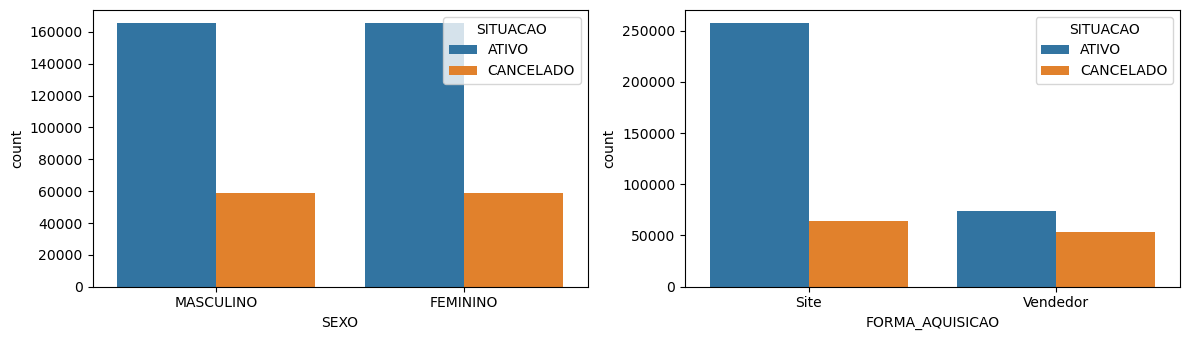

In [26]:
# Analisando o gráfico da variavel FORMA_AQUISICAO e SEXO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis

plt.rcParams["figure.figsize"] = [12.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(data = df_original, x = "SEXO", hue = "SITUACAO", ax=axes[0])
sns.countplot(data = df_original, x = "FORMA_AQUISICAO", hue = "SITUACAO", ax=axes[1])
plt.show()

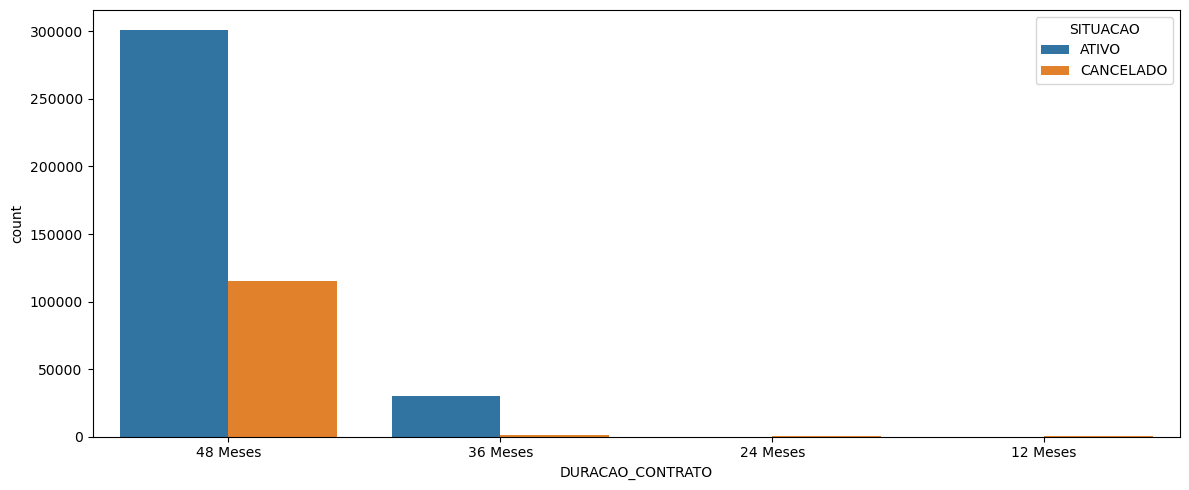

In [27]:
# Analisando o gráfico da variavel DURACAO_CONTRATO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_original, x = "DURACAO_CONTRATO", hue = "SITUACAO")
plt.show()

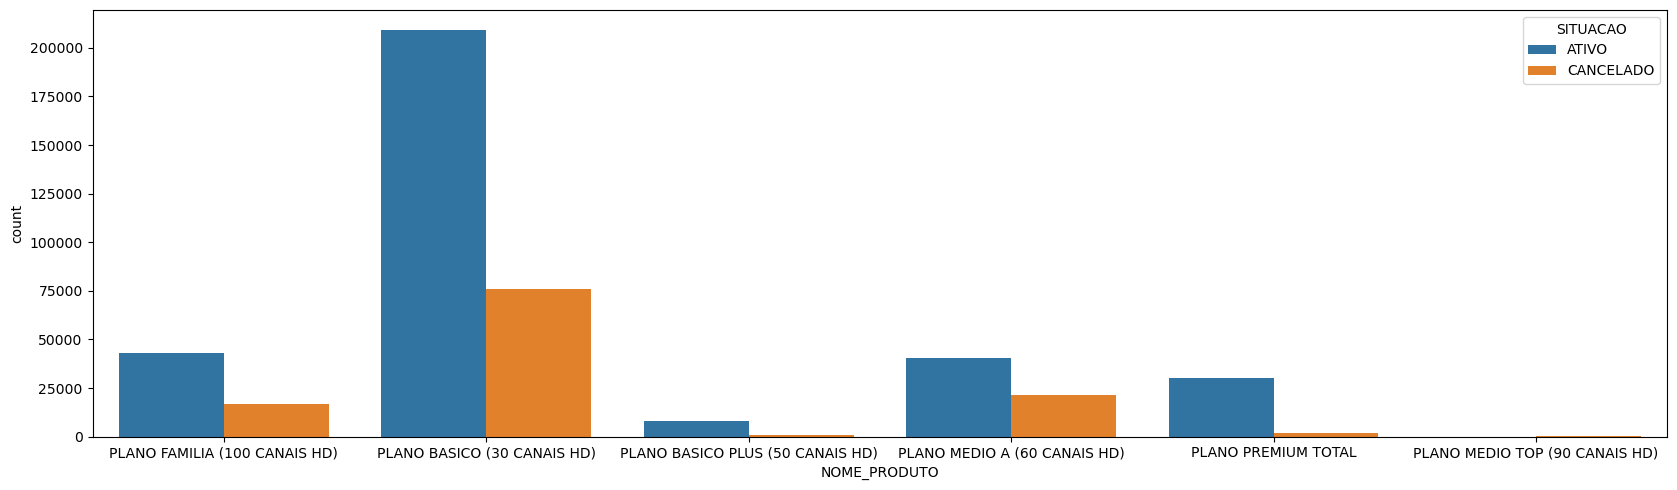

In [28]:
# Analisando o gráfico da variavel NOME_PRODUTO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis
plt.rcParams["figure.figsize"] = [17.00, 5.00]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_original, x = "NOME_PRODUTO", hue = "SITUACAO")
plt.show()

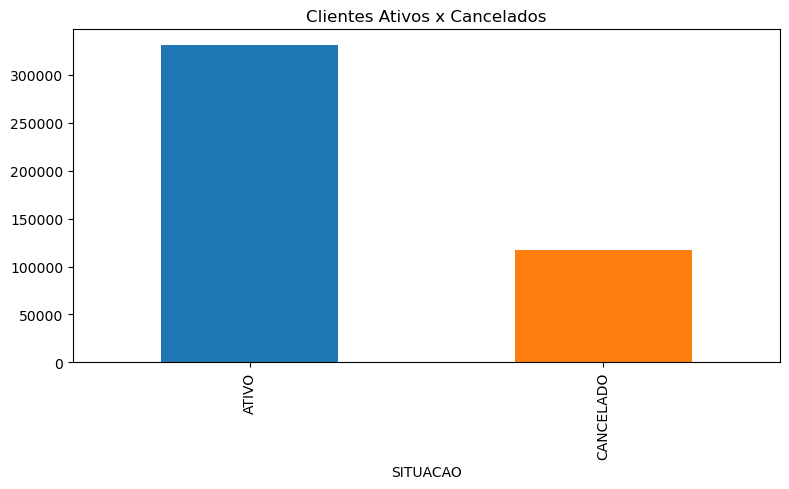

In [29]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais CLIENTES ATIVOS do que CLIENTES CANCELADOS
#dessa forma, precisaremos balancear o dataset na etapa 2 - Tratamento de Dados.
plt.rcParams["figure.figsize"] = [8.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df_original.SITUACAO.value_counts().plot(kind='bar', title='Clientes Ativos x Cancelados',color = ['#1F77B4', '#FF7F0E']);

### Analisando as Variaveis Numéricas

In [31]:
# Carregar variaveis para plot
# Pegaremos a partir da variavel 1 porque o ID_CLIENTE não iremos utilizar
variaveis_numericas = []
for i in df_original.columns[1:24].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':            
            print(i, ':' , df_original.dtypes[i]) 
            variaveis_numericas.append(i)    

IDADE_CLIENTE : int64
QT_FILHOS : float64
DIAS_ATIVO : int64
MESES_ATIVO : int64
VL_PLANO_ADESAO : int64
VL_PLANO_ATUAL : int64
QT_PONTOS_INSTALADOS : int64
QT_PC_PAGAS : int64
QT_PC_VENCIDAS : int64
QT_PC_PAGA_ATRASO : int64
QT_PC_PAGA_EM_DIA : int64
QT_ACORDO_PAGAMENTO : int64
VL_MENSALIDADE_ATRASO : int64
VL_MENSALIDADE_DT_AQUISICAO : int64
VL_MENSALIDADE_DT_ATUAL : int64
COD_SITUACAO : int64


In [32]:
#Quantidade de variaveis
len(variaveis_numericas)

16

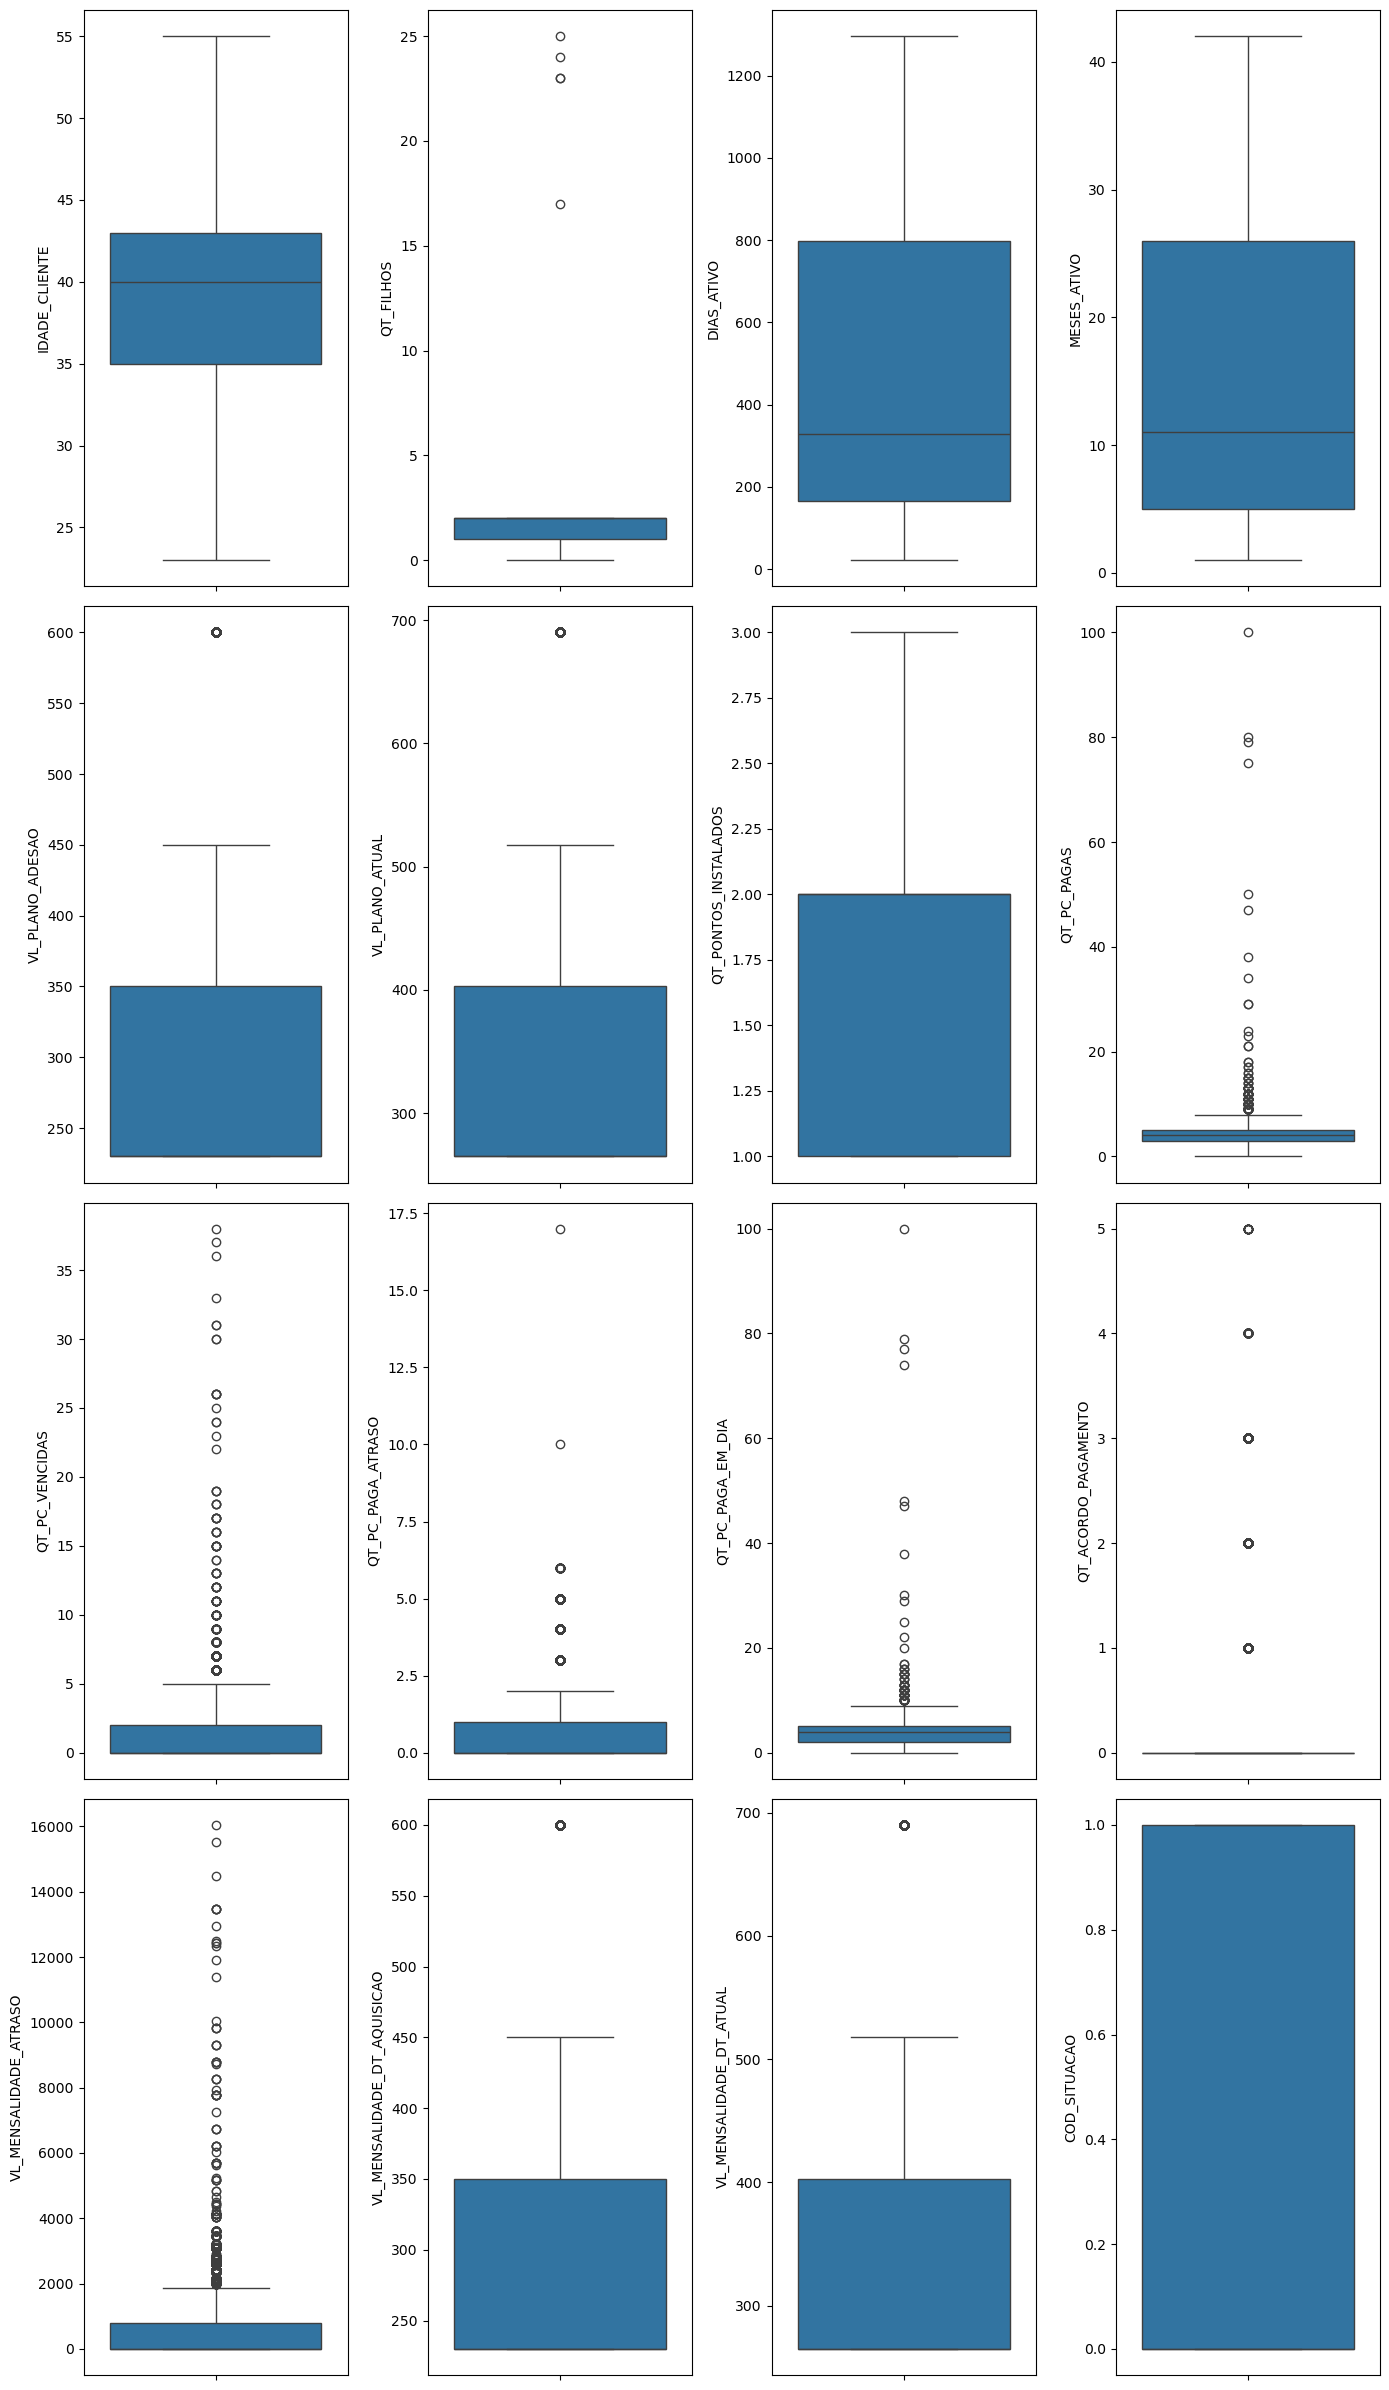

In [33]:
#Podemos observar nos boxplots abaixo que algumas variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 24.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 4) #4 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show()

In [34]:
# A Variavel QT_PC_PAGA_EM_DIA e QT_PC_PAGAS possui um número maior que o prazo máximo do contrato, por isso podemos constatar 
# que foi algum erro dos dados gerando este OUTLIER e iremos trata-los considerando o número máximo do prazo do contrato

# A Variavel QT_FILHOS também possui alguns OUTLIERS como por exemplo, 17, 23 e 24 filhos. Vamos avaliar a quantidade
# desses dados e verificar como iremos trata-los.

In [35]:
# Temos apenas 5 registros dentro de um volume de mais de 440 mil registros, dessa forma iremos exclui-los pois não irá causar
# impacto de perda de dados, pois a quantidade é muito pequena comparada ao total de registros.
df_original.groupby(['QT_FILHOS']).size()

QT_FILHOS
0.0         10
1.0     212353
2.0     235825
17.0         1
23.0         2
24.0         1
25.0         1
dtype: int64

In [36]:
# Aqui podemos ver os registros...
df_original.loc[df_original['QT_FILHOS'] > 2]

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
3,4,Vendedor,26,FEMININO,17.0,2019-06-25,NaT,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
91,92,Vendedor,48,FEMININO,23.0,2018-08-03,NaT,1083,35,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
164,165,Vendedor,55,MASCULINO,23.0,2018-06-19,NaT,1128,37,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,2,3,1,0,230,265,ATIVO,0
273,274,Vendedor,32,FEMININO,24.0,2018-05-02,NaT,1176,38,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,2,3,1,0,230,265,ATIVO,0
454,455,Vendedor,38,MASCULINO,25.0,2018-09-04,NaT,1051,34,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,1,0,230,265,ATIVO,0


## Tratamento de Dados
<p> Vamos tratar os dados que identificamos na fase de Analise Exploratória<br><br>

1 - Tratar os OUTILIERS <br>
2 - Tratar valores nulos (Variável QT_FILHOS possui 254 valores nulos)<br>
3 - Tratar as variaveis QT_PC_PAGA_EM_DIA e QT_PC_PAGAS <br>
4 - Engenharia de Atributos (Criar variavel NIVEL PAGAMENTO)<br>
5 - Balancear variavel target<br>
6 - Aplicar o OneHotEncoding<br>

In [38]:
df_original.shape

(448447, 24)

In [39]:
# Manteremos o DataFrame Priginal e os dados tratados ficarão no DataFrame chamado df_dados
df_dados = df_original.loc[df_original['QT_FILHOS'] <= 2]
df_dados.shape

(448188, 24)

In [40]:
df_dados.groupby(['QT_FILHOS']).size()

QT_FILHOS
0.0        10
1.0    212353
2.0    235825
dtype: int64

In [42]:
print('Média de Filhos: ', df_dados['QT_FILHOS'].mean())
print('Mediana de Filhos: ',df_dados['QT_FILHOS'].median())
print('Moda: ', df_dados['QT_FILHOS'].mode())

Média de Filhos:  1.5261519719403465
Mediana de Filhos:  2.0
Moda:  0    2.0
Name: QT_FILHOS, dtype: float64


In [43]:
# Preencheremos os valores NULOS com a mediana dos dados
df_dados['QT_FILHOS'] = df_dados['QT_FILHOS'].fillna((df_dados['QT_FILHOS'].median()))
df_dados.isnull().sum()

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                           0
DT_AQUISICAO                        0
DT_CANCELAMENTO                330987
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64

In [44]:
# Substituindo os dados da variavel DURACAO_CONTRATO para mantermos somente os números
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['12 Meses'], 12)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['24 Meses'], 24)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['36 Meses'], 36)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['48 Meses'], 48)

In [45]:
# Visualizando as primeiras linhas do dataset
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,2021-06-18,NaT,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,2018-04-10,NaT,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,2020-10-09,NaT,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,2019-09-19,NaT,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0
5,6,Vendedor,28,FEMININO,1.0,2018-03-23,NaT,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0


In [46]:
# Visualizando as informações dos tipos de variaveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ID_CLIENTE                   448188 non-null  int64         
 1   FORMA_AQUISICAO              448188 non-null  object        
 2   IDADE_CLIENTE                448188 non-null  int64         
 3   SEXO                         448188 non-null  object        
 4   QT_FILHOS                    448188 non-null  float64       
 5   DT_AQUISICAO                 448188 non-null  datetime64[ns]
 6   DT_CANCELAMENTO              117201 non-null  datetime64[ns]
 7   DIAS_ATIVO                   448188 non-null  int64         
 8   MESES_ATIVO                  448188 non-null  int64         
 9   DURACAO_CONTRATO             448188 non-null  int64         
 10  VL_PLANO_ADESAO              448188 non-null  int64         
 11  VL_PLANO_ATUAL               44

In [47]:
# Identificando as quantidades máximas para tratar os OUTLIERS
print(df_dados['QT_PC_PAGAS'].max())
print(df_dados['QT_PC_PAGA_EM_DIA'].max())

100
100


In [48]:
# Registros que possuirem as quantidades superiores a duração do contrato, iremos alterar e colocar o número de duração contrato
df_dados.loc[df_dados.QT_PC_PAGAS > df_dados.DURACAO_CONTRATO, 'QT_PC_PAGAS'] = df_dados.DURACAO_CONTRATO
df_dados.loc[df_dados.QT_PC_PAGA_EM_DIA > df_dados.DURACAO_CONTRATO, 'QT_PC_PAGA_EM_DIA'] = df_dados.DURACAO_CONTRATO

In [49]:
# Verificando se as variáveis foram ajustadas
print(df_dados['QT_PC_PAGAS'].max())
print(df_dados['QT_PC_PAGA_EM_DIA'].max())

48
48


In [71]:
# Engenharia de Atributos
# Criando uma nova variável de categoria de nivel de pagamento de acordo com a quantidade de parcelas pagas
bins = [-100, 3, 6, 12, 48]
labels = ['RUIM', 'MEDIO', 'BOM', 'OTIMO']
df_dados['NIVEL_PAGAMENTO'] = pd.cut(df_dados['QT_PC_PAGAS'], bins=bins, labels=labels)
pd.value_counts(df_dados.NIVEL_PAGAMENTO)

NIVEL_PAGAMENTO
MEDIO    297750
RUIM     149912
BOM         488
OTIMO        38
Name: count, dtype: int64

In [73]:
# Visualizando as primeiras linhas do dataset
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,2021-06-18,NaT,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,RUIM
1,2,Vendedor,24,FEMININO,0.0,2018-04-10,NaT,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,MEDIO
2,3,Site,25,MASCULINO,0.0,2020-10-09,NaT,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,MEDIO
4,5,Vendedor,27,MASCULINO,0.0,2019-09-19,NaT,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,MEDIO
5,6,Vendedor,28,FEMININO,1.0,2018-03-23,NaT,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,MEDIO


In [74]:
# Fazendo uma cópia do DataFrame
df_dados_2 = df_dados.copy()
df_dados_2.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,2021-06-18,NaT,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,RUIM
1,2,Vendedor,24,FEMININO,0.0,2018-04-10,NaT,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,MEDIO
2,3,Site,25,MASCULINO,0.0,2020-10-09,NaT,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,MEDIO
4,5,Vendedor,27,MASCULINO,0.0,2019-09-19,NaT,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,MEDIO
5,6,Vendedor,28,FEMININO,1.0,2018-03-23,NaT,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,MEDIO


In [76]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
# O encoder irá transformar essas variáveis em números (Lembre-se, os algoritmos de Machine Learning só entendem números)
df_dados_2['SEXO'] = lb.fit_transform(df_dados_2['SEXO'])
df_dados_2['FORMA_AQUISICAO'] = lb.fit_transform(df_dados_2['FORMA_AQUISICAO'])
df_dados_2['NOME_PRODUTO'] = lb.fit_transform(df_dados_2['NOME_PRODUTO'])
df_dados_2['NIVEL_PAGAMENTO'] = lb.fit_transform(df_dados_2['NIVEL_PAGAMENTO'])

In [77]:
# Visualizando as primerias 20 linhas do Dataset
df_dados_2.head(10)

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,0,23,1,0.0,2021-06-18,NaT,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518,ATIVO,0,3
1,2,1,24,0,0.0,2018-04-10,NaT,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265,ATIVO,0,1
2,3,0,25,1,0.0,2020-10-09,NaT,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334,ATIVO,0,1
4,5,1,27,1,0.0,2019-09-19,NaT,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265,ATIVO,0,1
5,6,1,28,0,1.0,2018-03-23,NaT,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265,ATIVO,0,1
6,7,1,29,1,2.0,2019-02-04,NaT,898,29,48,350,403,3,1,1,0,0,1,0,0,350,403,ATIVO,0,3
7,8,0,30,0,1.0,2020-11-11,NaT,252,8,48,230,265,0,2,5,0,2,3,1,0,230,265,ATIVO,0,1
8,9,1,31,1,2.0,2018-07-31,NaT,1086,36,48,290,334,1,3,4,0,2,2,0,0,290,334,ATIVO,0,1
9,10,0,32,0,1.0,2021-05-03,NaT,79,2,48,230,265,0,1,2,3,1,1,1,794,230,265,ATIVO,0,3
10,11,0,33,1,2.0,2021-06-16,NaT,35,1,48,230,265,0,2,1,5,0,1,1,1323,230,265,ATIVO,0,3


In [78]:
# Exclusão de Colunas
to_drop = ['DT_AQUISICAO','QT_PONTOS_INSTALADOS'] #column drop list

In [79]:
df_dados_2.drop(to_drop, inplace=True, axis=1)

In [81]:
df_dados_2.head(5)

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,0,23,1,0.0,NaT,33,1,48,450,518,2,1,4,0,1,1,2070,450,518,ATIVO,0,3
1,2,1,24,0,0.0,NaT,1198,39,48,230,265,0,5,0,1,4,0,0,230,265,ATIVO,0,1
2,3,0,25,1,0.0,NaT,285,9,48,290,334,1,5,0,3,2,0,0,290,334,ATIVO,0,1
4,5,1,27,1,0.0,NaT,671,22,48,230,265,0,5,0,5,0,0,0,230,265,ATIVO,0,1
5,6,1,28,0,1.0,NaT,1216,40,48,230,265,0,5,0,0,5,0,0,230,265,ATIVO,0,1


In [187]:
#Listando as colunas do nosso Dataset
df_dados_2.columns.tolist()

['FORMA_AQUISICAO',
 'IDADE_CLIENTE',
 'SEXO',
 'QT_FILHOS',
 'DIAS_ATIVO',
 'MESES_ATIVO',
 'DURACAO_CONTRATO',
 'VL_PLANO_ADESAO',
 'VL_PLANO_ATUAL',
 'NOME_PRODUTO',
 'QT_PC_PAGAS',
 'QT_PC_VENCIDAS',
 'QT_PC_PAGA_ATRASO',
 'QT_PC_PAGA_EM_DIA',
 'QT_ACORDO_PAGAMENTO',
 'VL_MENSALIDADE_ATRASO',
 'VL_MENSALIDADE_DT_AQUISICAO',
 'VL_MENSALIDADE_DT_ATUAL',
 'NIVEL_PAGAMENTO',
 'COD_SITUACAO']

In [189]:
# Vamos filtrar e utilizar somente as colunas necessárias
columns = ['FORMA_AQUISICAO',
 'IDADE_CLIENTE',
 'SEXO',
 'QT_FILHOS', 
 'DIAS_ATIVO',
 'MESES_ATIVO',
 'DURACAO_CONTRATO',
 'VL_PLANO_ADESAO',
 'VL_PLANO_ATUAL',
 'NOME_PRODUTO',
 #'QT_PONTOS_INSTALADOS',
 'QT_PC_PAGAS',
 'QT_PC_VENCIDAS',
 'QT_PC_PAGA_ATRASO',
 'QT_PC_PAGA_EM_DIA',
 'QT_ACORDO_PAGAMENTO',
 'VL_MENSALIDADE_ATRASO',
 'VL_MENSALIDADE_DT_AQUISICAO',
 'VL_MENSALIDADE_DT_ATUAL',
 'NIVEL_PAGAMENTO',
 'COD_SITUACAO']

df_dados_2 = pd.DataFrame(df_dados_2, columns=columns)

In [191]:
# Visualizando as primeiras linhas do arquivo novamente
df_dados_2.head()

,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,NIVEL_PAGAMENTO,COD_SITUACAO
0,0,23,1,0.0,33,1,48,450,518,2,1,4,0,1,1,2070,450,518,3,0
1,1,24,0,0.0,1198,39,48,230,265,0,5,0,1,4,0,0,230,265,1,0
2,0,25,1,0.0,285,9,48,290,334,1,5,0,3,2,0,0,290,334,1,0
4,1,27,1,0.0,671,22,48,230,265,0,5,0,5,0,0,0,230,265,1,0
5,1,28,0,1.0,1216,40,48,230,265,0,5,0,0,5,0,0,230,265,1,0


In [161]:
# Verificando os tipos de variáveis
df_dados_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FORMA_AQUISICAO              448188 non-null  int32  
 1   IDADE_CLIENTE                448188 non-null  int64  
 2   SEXO                         448188 non-null  int32  
 3   QT_FILHOS                    448188 non-null  float64
 4   DIAS_ATIVO                   448188 non-null  int64  
 5   MESES_ATIVO                  448188 non-null  int64  
 6   DURACAO_CONTRATO             448188 non-null  int64  
 7   VL_PLANO_ADESAO              448188 non-null  int64  
 8   VL_PLANO_ATUAL               448188 non-null  int64  
 9   NOME_PRODUTO                 448188 non-null  int32  
 10  QT_PC_PAGAS                  448188 non-null  int64  
 11  QT_PC_VENCIDAS               448188 non-null  int64  
 12  QT_PC_PAGA_ATRASO            448188 non-null  int64  
 13  QT_P

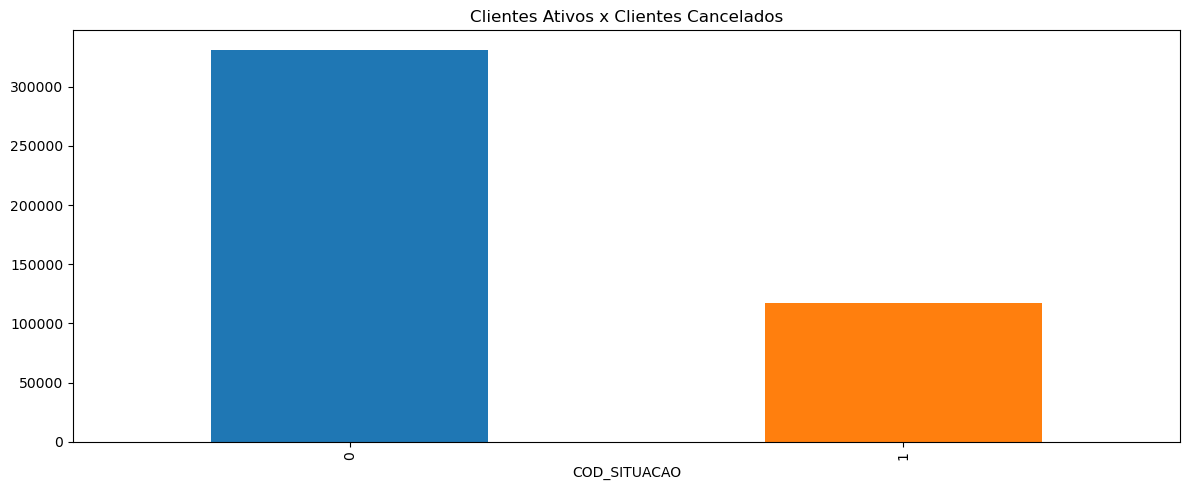

In [163]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais CLIENTES ATIVOS do que CLIENTES CANCELADOS
#dessa forma, precisaremos balancear o dataset na etapa 2 - Tratamento de Dados.
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df_dados_2.COD_SITUACAO.value_counts().plot(kind='bar', title='Clientes Ativos x Clientes Cancelados',color = ['#1F77B4', '#FF7F0E']);

In [193]:
#Separar variaveis preditoras e target
PREDITORAS = df_dados_2.iloc[:, 0:19]  
TARGET = df_dados_2.iloc[:, 19] 

In [197]:
PREDITORAS.head(15)

,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,NIVEL_PAGAMENTO
0,0,23,1,0.0,33,1,48,450,518,2,1,4,0,1,1,2070,450,518,3
1,1,24,0,0.0,1198,39,48,230,265,0,5,0,1,4,0,0,230,265,1
2,0,25,1,0.0,285,9,48,290,334,1,5,0,3,2,0,0,290,334,1
4,1,27,1,0.0,671,22,48,230,265,0,5,0,5,0,0,0,230,265,1
5,1,28,0,1.0,1216,40,48,230,265,0,5,0,0,5,0,0,230,265,1
6,1,29,1,2.0,898,29,48,350,403,3,1,0,0,1,0,0,350,403,3
7,0,30,0,1.0,252,8,48,230,265,0,5,0,2,3,1,0,230,265,1
8,1,31,1,2.0,1086,36,48,290,334,1,4,0,2,2,0,0,290,334,1
9,0,32,0,1.0,79,2,48,230,265,0,2,3,1,1,1,794,230,265,3
10,0,33,1,2.0,35,1,48,230,265,0,1,5,0,1,1,1323,230,265,3


In [201]:
TARGET.head(15)

0     0
1     0
2     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
Name: COD_SITUACAO, dtype: int64

In [ ]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

In [ ]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES.value_counts().plot(kind='bar', title='Clientes Ativos x Clientes Cancelados',color = ['#1F77B4', '#FF7F0E']);

In [124]:
# Quantidade de registros antes do balanceamento
PREDITORAS.shape

(448188, 20)

In [126]:
# Quantidade de registros antes do balanceamento
TARGET.shape

(448188,)

In [ ]:
# Quantidade de registros após do balanceamento
PREDITORAS_RES.shape

In [ ]:
# Quantidade de registros após do balanceamento
TARGET_RES.shape

In [203]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS, TARGET, test_size = 0.3, random_state = 42)

In [205]:
X_treino.head(15)

,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,NIVEL_PAGAMENTO
69340,1,46,1,1.0,224,7,48,450,518,2,6,0,0,6,0,0,450,518,1
153607,1,42,0,2.0,170,5,48,350,403,3,5,1,0,5,0,403,350,403,1
179037,0,38,0,1.0,1126,37,48,230,265,0,4,0,0,4,0,0,230,265,1
180737,0,25,0,1.0,1106,36,48,450,518,2,4,0,0,4,0,0,450,518,1
395226,0,42,1,2.0,41,1,48,230,265,0,2,3,0,2,0,794,230,265,3
410948,0,42,1,1.0,161,5,48,230,265,0,2,3,1,1,0,794,230,265,3
364756,0,43,1,2.0,293,9,48,230,265,0,4,0,3,1,0,0,230,265,1
62878,1,42,1,1.0,287,9,48,230,265,0,5,0,2,3,0,0,230,265,1
227828,0,52,1,1.0,611,20,48,230,265,0,5,0,0,5,0,0,230,265,1
159845,1,37,0,2.0,178,5,48,350,403,3,0,3,0,0,0,1208,350,403,3


In [207]:
# Padronizando as Variáveis - Pré Processamento dos Dados
Padronizador = StandardScaler()
X_treino_padronizados = Padronizador.fit_transform(X_treino)
X_teste_padronizados = Padronizador.transform(X_teste)

In [209]:
# Visualizando os dados padronizados
X_treino_padronizados

array([[ 1.58821148,  1.06515912,  0.99943598, ...,  1.28588814,
         1.28708723, -0.70593523],
       [ 1.58821148,  0.46666651, -1.00056434, ...,  0.40584956,
         0.40641773, -0.70593523],
       [-0.62963907, -0.1318261 , -1.00056434, ..., -0.65019673,
        -0.65038566, -0.70593523],
       ...,
       [ 1.58821148,  0.46666651, -1.00056434, ...,  0.40584956,
         0.40641773,  1.41121251],
       [ 1.58821148,  0.61628966,  0.99943598, ..., -0.65019673,
        -0.65038566,  1.41121251],
       [ 1.58821148,  0.46666651, -1.00056434, ...,  1.28588814,
         1.28708723, -0.70593523]])

In [211]:
# Range de valores de k que iremos testar
kVals = range(3, 7, 3)

In [213]:
# Lista vazia para receber as acurácias
acuracias = []

In [183]:
### Testando o modelo primeiramente com os dados normais, sem estarem padronizados

In [215]:
start = time.time()
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(X_treino, Y_treino)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(X_teste, Y_teste)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)
end = time.time()
tempo_execucao  = (end - start) / 60 # Para dar o tempo em minutos

print('Tempo de Treinamento do Modelo:', tempo_execucao)    

Com valor de k = 3, a acurácia é = 98.63%
Com valor de k = 6, a acurácia é = 98.57%
Tempo de Treinamento do Modelo: 4.067947785059611


In [216]:
### Testando o modelo com os dados padronizadosc

In [217]:
start = time.time()
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(X_treino_padronizados, Y_treino)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(X_teste_padronizados, Y_teste)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)
end = time.time()
tempo_execucao  = (end - start) / 60 # Para dar o tempo em minutos

print('Tempo de Treinamento do Modelo:', tempo_execucao)   

Com valor de k = 3, a acurácia é = 97.13%
Com valor de k = 6, a acurácia é = 96.81%
Tempo de Treinamento do Modelo: 4.177615328629812


In [221]:
# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 3 alcançou a mais alta acurácia de 98.63% nos dados de validação!


In [223]:
# Criando a versão final do modelo com o maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors = 3)
modeloFinal.fit(X_treino, Y_treino)

KNeighborsClassifier(n_neighbors=3)

In [225]:
# Previsões com os dados de teste
previsoes = modeloFinal.predict(X_teste)

In [229]:
print('Acurácia do modelo: ' , accuracy_score(Y_teste, previsoes))

Acurácia do modelo:  0.986307890254877


### Realizar a validação com um pool de modelos

In [245]:
# Criando uma função para definir os modelos a serem testados e verificar as métricas de desempenho dos modelos

def model_test(x,y):
    gauss = GaussianNB()
    knn = KNeighborsClassifier()
    svm = SVC()
    bernoulli = BernoulliNB()
    rforest= RandomForestClassifier()
    gradboost = GradientBoostingClassifier()
    lreg = LogisticRegression()
    dtree = DecisionTreeClassifier()
    xgb = XGBClassifier()
    lgbm = LGBMClassifier()
    cbc =  CatBoostClassifier()

    models = [gauss,knn,svm,bernoulli,rforest,gradboost,lreg,dtree,xgb,lgbm,cbc]
    model_names = ["GaussianNB","KNeighborsClassifier","SVC","BernoulliNB","RandomForestClassifier","GradientBoostingClassifier","LogisticRegression","DecisionTreeClassifier","XGBoost","LightGBM","CatBoostClassifier"]
    
    f1 = []
    acc = []
    prec = []
    rec = []
 
    score = pd.DataFrame(columns = ["F1_Score","Accuracy_Score","Precision_Score","Recall_Score"],index = model_names)
    
    X_train = X_treino.values
    y_train = Y_treino 
    
    X_test = X_teste.values
    y_test = Y_teste
    
    for model in models:
        model.fit(X_train,y_train)
        f1.append(f1_score(model.predict(X_test), y_test))
        acc.append(accuracy_score(model.predict(X_test),y_test))
        prec.append(precision_score(model.predict(X_test),y_test))
        rec.append(recall_score(model.predict(X_test),y_test))
    
    score.F1_Score = f1        
    score.Accuracy_Score = acc
    score.Precision_Score = prec
    score.Recall_Score = rec
    #score.ROC_AUC = rocauc
    
    return score.sort_values("Accuracy_Score", ascending=False)
    

In [247]:
model_test(X_treino,Y_treino)

[LightGBM] [Info] Number of positive: 82118, number of negative: 231613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 313731, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.261747 -> initscore=-1.036911
[LightGBM] [Info] Start training from score -1.036911
Learning rate set to 0.11994
0:	learn: 0.3478110	total: 230ms	remaining: 3m 49s
1:	learn: 0.1922439	total: 290ms	remaining: 2m 24s
2:	learn: 0.1153750	total: 352ms	remaining: 1m 56s
3:	learn: 0.0823054	total: 409ms	remaining: 1m 41s
4:	learn: 0.0669783	total: 469ms	remaining: 1m 33s
5:	learn: 0.0599950	total: 525ms	remaining: 1m 27s
6:	learn: 0.0546620	total: 584ms	remaining: 1m 22s
7:	learn: 0.0510221	total: 640ms	remaining: 1m 19s
8:	l

,F1_Score,Accuracy_Score,Precision_Score,Recall_Score
CatBoostClassifier,0.986330,0.992868,0.986176,0.986485
XGBoost,0.985345,0.992354,0.985064,0.985626
LightGBM,0.985199,0.992273,0.985634,0.984764
RandomForestClassifier,0.983370,0.991321,0.983468,0.983272
DecisionTreeClassifier,0.980370,0.989774,0.978708,0.982039
GradientBoostingClassifier,0.978479,0.988732,0.981672,0.975306
KNeighborsClassifier,0.974190,0.986494,0.976883,0.971511
GaussianNB,0.915806,0.953970,0.959439,0.875969
SVC,0.902110,0.948177,0.915173,0.889415
LogisticRegression,0.777944,0.882141,0.791238,0.765090


### Treinanndo o modelo final

In [252]:
# Criando a versão final do modelo com o maior valor de k
modeloFinal = CatBoostClassifier(silent=True)
modeloFinal.fit(X_treino, Y_treino)

In [260]:
# Realizando a Predição da Base de Testes:
y_pred = modeloFinal.predict(X_teste)

In [270]:
# Validando as métricas
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99374
           1       0.99      0.99      0.99     35083

    accuracy                           0.99    134457
   macro avg       0.99      0.99      0.99    134457
weighted avg       0.99      0.99      0.99    134457



In [274]:
mat_conf = confusion_matrix(Y_teste, y_pred)
print("Matriz de confusão:")
print(mat_conf)

Matriz de confusão:
[[98900   474]
 [  485 34598]]


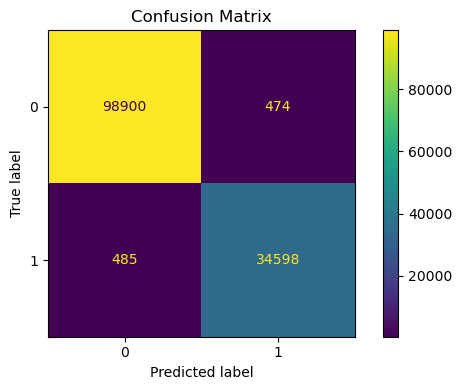

In [282]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(mat_conf, display_labels=modeloFinal.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

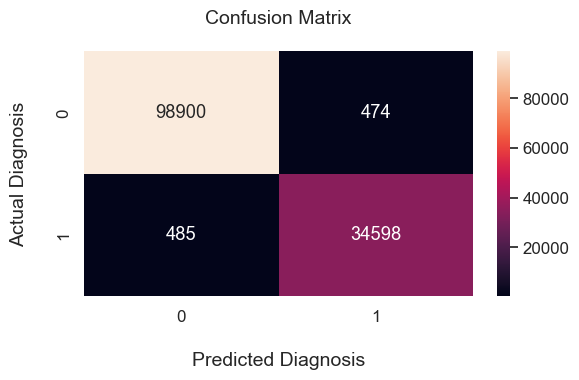

In [286]:
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(6,4), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(mat_conf, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['0', '1'])

# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['0', '1'])

# set plot title
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()